## Trafic Prediction Using CatBoost

## Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Dtat Import

In [59]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Traffic.csv")
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


## Data Analysis

In [60]:
df.shape

(2976, 9)

## Checking For NullValues

In [61]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

From the above we can see that there are no null vlues iin the given data

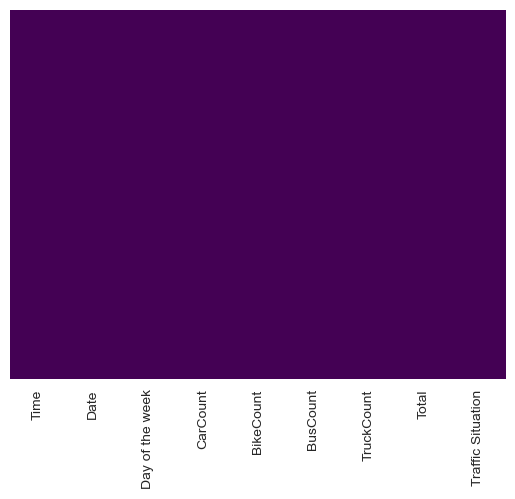

In [62]:
## WE can also see find out null values by using HeatMap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

* From the above heat we can confirm that there are no null values in the data

In [63]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


* We can see that there are no duplicate values

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [65]:
 df.select_dtypes(exclude='object').columns

Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total'], dtype='object')

In [66]:
 df.select_dtypes(include='object').columns

Index(['Time', 'Day of the week', 'Traffic Situation'], dtype='object')

In [67]:
df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [68]:
df.nunique()

Time                  96
Date                  31
Day of the week        7
CarCount             172
BikeCount             71
BusCount              51
TruckCount            41
Total                239
Traffic Situation      4
dtype: int64

In [69]:
df.drop_duplicates(inplace=True)

## Descriptive Statistics

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,2976.0,16.000000,8.945775,1.0,8.0,16.0,24.0,31.0
CarCount,2976.0,68.696573,45.850693,6.0,19.0,64.0,107.0,180.0
BikeCount,2976.0,14.917339,12.847518,0.0,5.0,12.0,22.0,70.0
BusCount,2976.0,15.279570,14.341986,0.0,1.0,12.0,25.0,50.0
TruckCount,2976.0,15.324933,10.603833,0.0,6.0,14.0,23.0,40.0
Total,2976.0,114.218414,60.190627,21.0,55.0,109.0,164.0,279.0


## Data Visualization

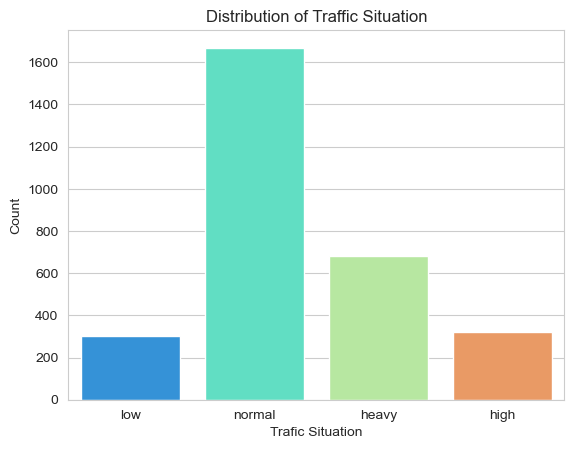

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Traffic Situation', data=df,palette='rainbow')
plt.xlabel('Trafic Situation')
plt.ylabel('Count')
plt.title('Distribution of Traffic Situation')
plt.show()

In [72]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [73]:
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['Day of the week']=pd.Categorical(df['Day of the week'],categories=days_order,ordered=True)
df=df.sort_values(by='Day of the week')
summary=df.groupby('Day of the week')[['CarCount','BikeCount','BusCount','TruckCount']].sum().reset_index()

## Setting 'Day of the week ' as th index for plotting

In [74]:
summary.set_index('Day of the week',inplace=True)

In [75]:
summary

,CarCount,BikeCount,BusCount,TruckCount
Day of the week,,,,
Monday,25893,5064,6206,6213
Tuesday,33426,6627,7816,7446
Wednesday,33424,6704,7943,7783
Thursday,32704,6633,8027,7626
Friday,26478,8452,3154,3896
Saturday,26446,5624,6151,6265
Sunday,26070,5290,6175,6378


## Data Visualization

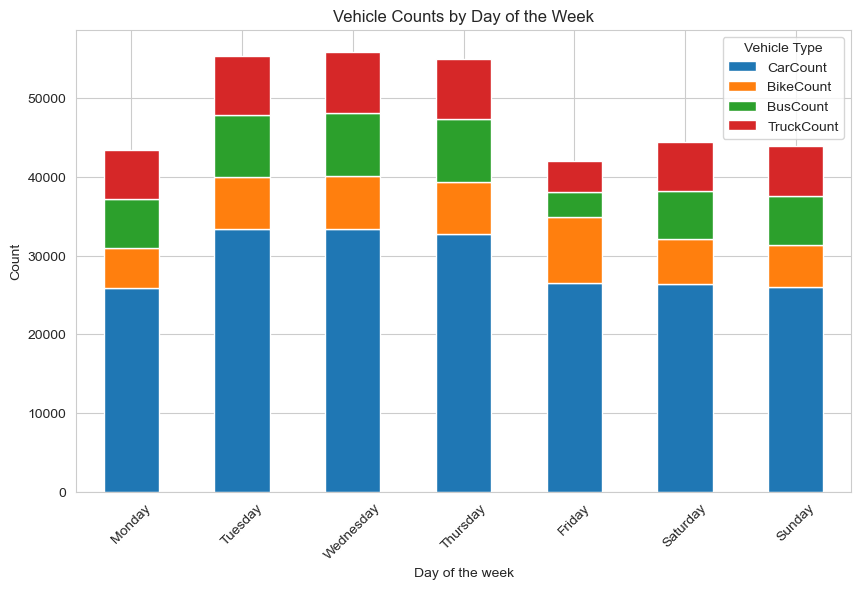

In [89]:
sns.set_style('whitegrid')
ax = summary.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_xlabel("Day of the week")
ax.set_ylabel("Count")
ax.set_title("Vehicle Counts by Day of the Week")
ax.legend(title="Vehicle Type")
plt.xticks(rotation=45)
plt.show()

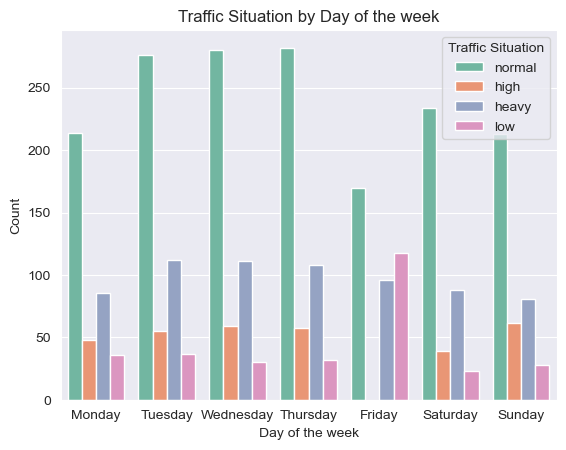

In [96]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='Day of the week',hue='Traffic Situation',palette='Set2')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Traffic Situation by Day of the week')
plt.show()

In [97]:
## Extractiing the hour from the 'Time' column
df['Hour']=pd.to_datetime(df['Time']).dt.hour

## Grouping the data by hour and sum the counts
hourly_traffic=df.groupby('Hour')[['CarCount','BikeCount','BusCount','TruckCount']].sum()

In [98]:
hourly_traffic

,CarCount,BikeCount,BusCount,TruckCount
Hour,,,,
0,1997,322,63,2940
1,2033,304,84,2826
2,1971,297,74,2962
3,2235,339,161,3126
4,8236,1498,522,1874
5,10433,1670,655,1450
6,14389,2940,3825,453
7,14300,2863,3766,449
8,14348,2919,3904,448


## Line Plot

<Figure size 1000x600 with 0 Axes>

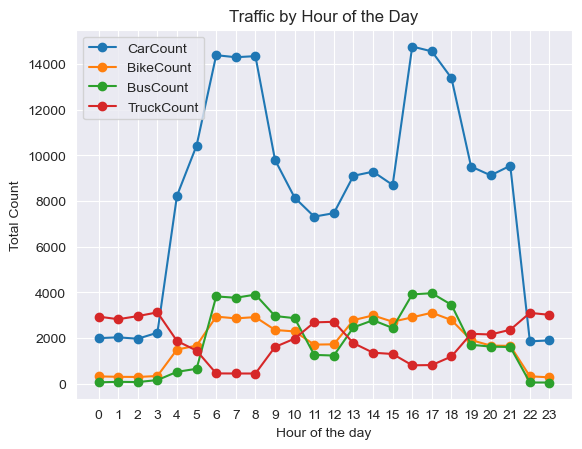

In [106]:
plt.figure(figsize=(10,6))
hourly_traffic.plot(kind="line", marker="o")
plt.xlabel("Hour of the day")
plt.ylabel("Total Count")
plt.title("Traffic by Hour of the Day")

plt.xticks(range(24))
plt.show()

* From the above Line plot we can observe the hourly Car,Bus,Bike and Truck Count

## Importiing the Libraries to Build Model

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from catboost import CatBoostClassifier

In [108]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
1248,12:00:00 AM,23,Monday,13,2,1,17,33,normal,0
2648,2:00:00 PM,6,Monday,70,21,32,18,141,high,14
2649,2:15:00 PM,6,Monday,49,21,11,20,101,normal,14
2650,2:30:00 PM,6,Monday,51,22,12,16,101,normal,14
2651,2:45:00 PM,6,Monday,84,12,15,15,126,normal,14


## Train-Test Split

In [109]:
X=df.drop(['Traffic Situation','Total','Hour'],axis=1)
y=df['Traffic Situation']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [111]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2232, 7), (744, 7), (2232,), (744,))

## Traiining with CatBoot

In [112]:
model=CatBoostClassifier(metric_period=100,cat_features=(0,2),loss_function='MultiClass')

In [114]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=round(accuracy_score(y_test,y_pred),2)
print('Accuracy Score:\n',acc)
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Learning rate set to 0.082434
0:	learn: 1.2354760	total: 39.4ms	remaining: 39.3s
100:	learn: 0.1285890	total: 3.53s	remaining: 31.4s
200:	learn: 0.0754963	total: 7.14s	remaining: 28.4s
300:	learn: 0.0526734	total: 10.7s	remaining: 24.9s
400:	learn: 0.0398248	total: 14.2s	remaining: 21.2s
500:	learn: 0.0314955	total: 17.9s	remaining: 17.8s
600:	learn: 0.0260506	total: 23.3s	remaining: 15.5s
700:	learn: 0.0221605	total: 28.2s	remaining: 12s
800:	learn: 0.0187333	total: 32.5s	remaining: 8.07s
900:	learn: 0.0163189	total: 36.6s	remaining: 4.02s
999:	learn: 0.0144441	total: 40.2s	remaining: 0us
Accuracy Score:
 0.97
Confusion Matrix:
 [[185   3   0   2]
 [  4  64   0   2]
 [  0   0  64   2]
 [  3   1   3 411]]


## Feature Importance

In [117]:
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

## Combineing feature importance and names into a DataFrame and sort by importance

In [118]:
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

## Plotting feature importance

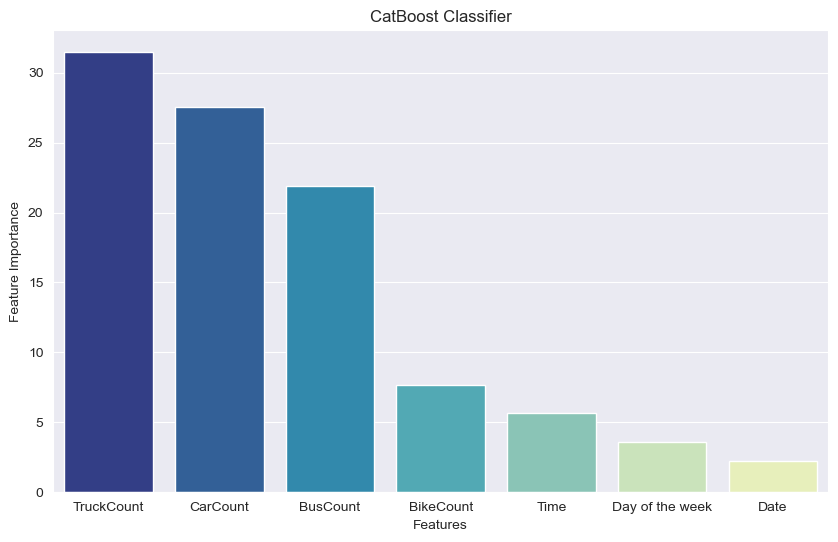

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Importance",data=feature_df,palette="YlGnBu_r")
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('CatBoost Classifier')
plt.show()
